### Module 3 InClass Assignment

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split.

- Use the LinearRegression class to learn a regression model on this data.

- You can evaluate with the score method, which provides the R^2 or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('bike_day_raw.csv')

In [3]:
# Check for missing values and data types
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB
None
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [4]:
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [6]:
# Split the data
X = df.drop('cnt', axis=1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1796978.1114466994
R² Score: 0.5518626278474863


2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression,
- Apply Ridge and do grid search
- Apply Lasso and do grid search
- Visualize the coefficients.


In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [12]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# Function to perform grid search and visualize coefficients
def model_fit_visualize(model, params, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid.best_params_}")
    print(f"Best score for {model.__class__.__name__}: {grid.best_score_}")

    # Visualize the coefficients
    model_best = grid.best_estimator_
    coefs = model_best.coef_
    plt.figure(figsize=(10, 5))
    plt.bar(np.arange(len(coefs)), coefs)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title(f'Coefficient Importance for {model.__class__.__name__}')
    plt.show()

    return model_best

In [17]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_coefs = lr_model.coef_

Best parameters for Ridge: {'alpha': 10}
Best score for Ridge: -3128.3692717029953


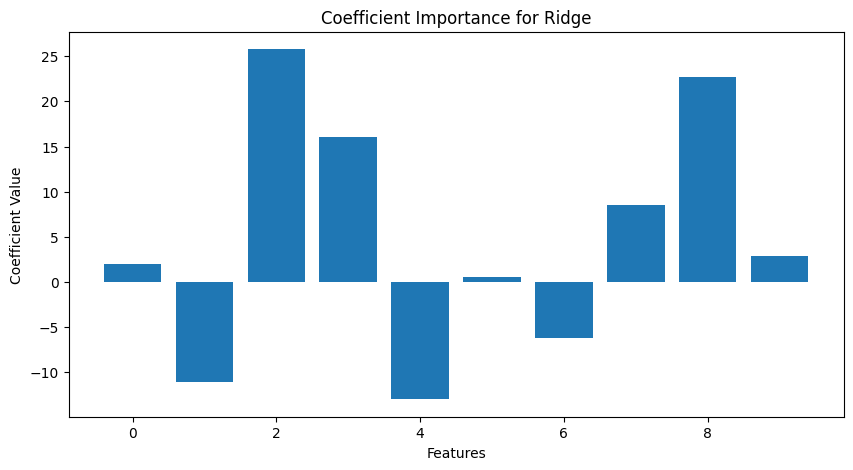

In [18]:
# Ridge
ridge_params = {'alpha': [0.1, 1, 10, 100, 1000]}
ridge_model = Ridge()
ridge_best = model_fit_visualize(ridge_model, ridge_params, X_train, y_train, X_test, y_test)

Best parameters for Lasso: {'alpha': 1}
Best score for Lasso: -3130.5858778554384


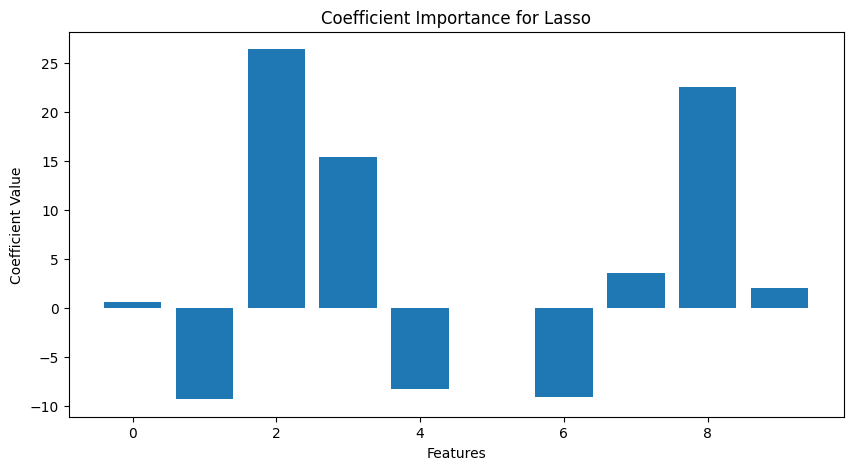

In [19]:
# Lasso
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_model = Lasso()
lasso_best = model_fit_visualize(lasso_model, lasso_params, X_train, y_train, X_test, y_test)

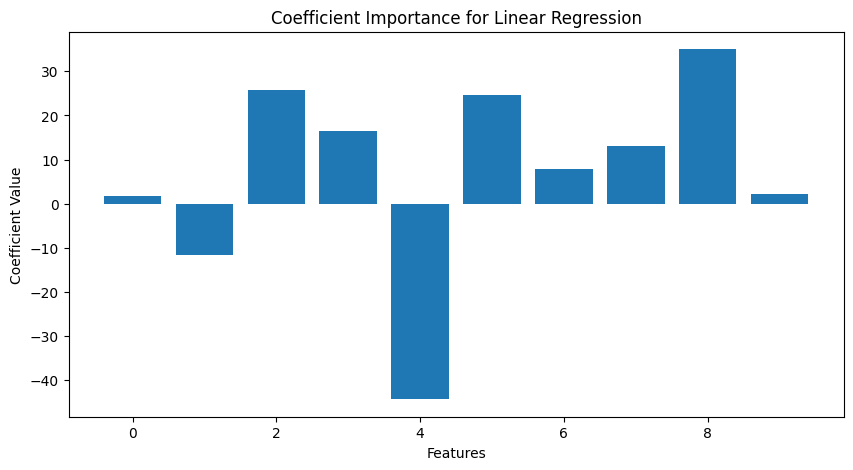

In [20]:
# Plot Linear Regression Coefficients for comparison
plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(lr_coefs)), lr_coefs)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Importance for Linear Regression')
plt.show()